In [21]:
import numpy as np
import matplotlib.pyplot as plt
import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")
import local
from models.preprocessing import utils
import mne
mne.utils.set_log_level('error')
from mne.baseline import rescale
from mne.stats import _bootstrap_ci as bootstrap_confidence_interval

In [22]:
iter_freqs = [
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 45)
]
baseline = None

event_id = [eids[v] for v in ['Stim/S 20','Stim/S 21','Stim/S 22','Stim/S 23']]
tmin, tmax = -1., 3.
frequency_map_visual = {k:[] for k in iter_freqs}

d = "../../data/reinhartlab/multimodal/"
#d = "G:\\Frederik\\data\\reinhartlab\\multimodal\\"
ext_in = ".raw.fif.gz"
box = utils.select_dataset(d,ext_in); box

In [23]:
for f in [d+c+ext_in for c in utils.get_selection(box)]:
    raw = mne.io.read_raw_fif(f)
    events,eids = mne.events_from_annotations(raw)
    for band, fmin, fmax in iter_freqs:
        raw = mne.io.read_raw_fif(f,preload=True)
        raw.pick_types(eeg=True)  # we just look at gradiometers
        # bandpass filter
        raw.filter(fmin, fmax, n_jobs=4,  # use more jobs to speed up.
                   l_trans_bandwidth=1,  # make sure filter params are the same
                   h_trans_bandwidth=1)  # in each band and skip "auto" option.

        # epoch
        epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline, preload=True)
        # remove evoked response
        epochs.subtract_evoked()

        # get analytic signal (envelope)
        epochs.apply_hilbert(envelope=True)
        frequency_map_visual[(band, fmin, fmax)].append(epochs.average())
        del epochs
    print(f)
del raw

../../data/reinhartlab/multimodal/cg/multimodal_eeg_056CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_105CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_060CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_058CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MultiModal_EEGTest_073CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MultiModal_EEGTest_066CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_061CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_069CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_081CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_076CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_092CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_087CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_049CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_102CG.raw.fif.gz
../../data/reinhartlab/mul

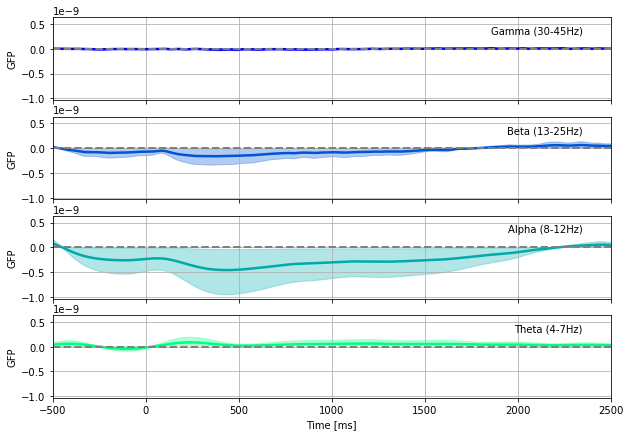

In [30]:
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 4))
for fm, color, ax in zip(
        frequency_map_visual, colors, axes.ravel()[::-1]):
    (freq_name, fmin, fmax) = fm
    epochs = frequency_map_visual[fm]; 
    average = mne.grand_average(epochs,interpolate_bads=False,drop_bads=False)
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(average.data, random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-500, 2500)

axes.ravel()[-1].set_xlabel('Time [ms]');

In [33]:
event_id = [eids[v] for v in ['Stim/S 16','Stim/S 17','Stim/S 18','Stim/S 19']]
frequency_map_audio = {k:[] for k in iter_freqs}
for f in [d+c+ext_in for c in utils.get_selection(box)]:
    raw = mne.io.read_raw_fif(f)
    events,eids = mne.events_from_annotations(raw)
    for band, fmin, fmax in iter_freqs:
        raw = mne.io.read_raw_fif(f,preload=True)
        raw.pick_types(eeg=True)  # we just look at gradiometers
        # bandpass filter
        raw.filter(fmin, fmax, n_jobs=4,  # use more jobs to speed up.
                   l_trans_bandwidth=1,  # make sure filter params are the same
                   h_trans_bandwidth=1)  # in each band and skip "auto" option.

        # epoch
        epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline, preload=True)
        # remove evoked response
        epochs.subtract_evoked()

        # get analytic signal (envelope)
        epochs.apply_hilbert(envelope=True)
        frequency_map_audio[(band, fmin, fmax)].append(epochs.average())
        del epochs
    print(f)
del raw

../../data/reinhartlab/multimodal/cg/multimodal_eeg_056CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_105CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_060CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_058CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MultiModal_EEGTest_073CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MultiModal_EEGTest_066CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_061CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_069CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_081CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_076CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_092CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_087CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/multimodal_eeg_049CG.raw.fif.gz
../../data/reinhartlab/multimodal/cg/MulitModal_EEG_102CG.raw.fif.gz
../../data/reinhartlab/mul

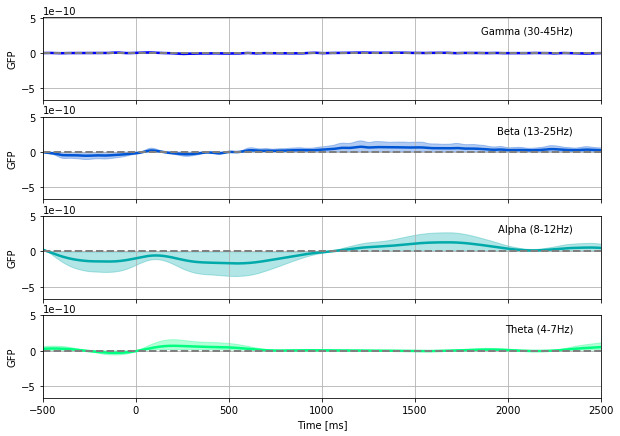

In [34]:
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 4))
for fm, color, ax in zip(
        frequency_map_audio, colors, axes.ravel()[::-1]):
    (freq_name, fmin, fmax) = fm
    epochs = frequency_map_audio[fm]; 
    average = mne.grand_average(epochs,interpolate_bads=False,drop_bads=False)
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(average.data, random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-500, 2500)

axes.ravel()[-1].set_xlabel('Time [ms]');